# Extract board position from PGN file

Chess Games are saved in a text file called a pgn.  The pgn file contains a header with information about the game, including the date, the winner of the game, and the ELO rating of each player.  We can extract this information from the header using the python "chess" library.  This package contains a number of useful tools, including the reading and parsing of PGN data, and the maintanence of a board.

The PGN also includes a list of moves made during the game.  By knowing the series of moves, we are able to recreate the game perfectly.

In [1]:
import chess
import chess.pgn
import pandas as pd
import numpy as np

Specify file to open
Open it
Use the header to determine which player is computer
Find specified board position
Extract FEN
add to dataframe
    -Who wins
    -Name of players
    -Who is bot
    -Player ELO

In [2]:
Standard_10 = 'Data_2\\Standard 1000-1199'
Standard_12 = 'Data_2\\Standard 1200-1399'
Standard_14 = 'Data_2\\Standard 1400-1599'
Standard_16 = 'Data_2\\Standard 1600-1799'
Standard_18 = 'Data_2\\Standard 1800-1999'
Standard_20 = 'Data_2\\Standard 2000-2199'
Standard_22 = 'Data_2\\Standard 2200-2399'
Standard_24 = 'Data_2\\Standard 2400-2599'
Standard_26 = 'Data_2\\Standard 2600 plus'

Data_Directory_List = [Standard_10,
                       Standard_12,
                       Standard_14,
                       Standard_16,
                       Standard_18,
                       Standard_20,
                       Standard_22,
                       Standard_24,
                       Standard_26]

In [3]:
Data_dict = {
    "White":[],
    "Black":[],
    "Winner":[],
    "White is Computer":[],
    "Black is Computer":[],
    "White ELO":[],
    "Black ELO":[],
    "Move FEN":[],
    "Move Number":[]
}

In [4]:
def Valid(header_in):
    if (header_in["Event"] == 'FICS unrated standard game' or
       header_in["Event"] == 'FICS rated standard game'):
        return True

In [5]:
def Browse_Games(pgn):
    game = chess.pgn.read_game(pgn)
    ticker = 0
    #initialize data_dict
    data_out = {
    "White":[],
    "Black":[],
    "Winner":[],
    "White is Computer":[],
    "Black is Computer":[],
    "White ELO":[],
    "Black ELO":[],
    "Move FEN":[],
    "Move Number":[]
    }
    while game and len(data_out["White"])<5000:
        header = game.headers
        board = game.board()
        ticker += 1
        if Valid(header):
            for i, move in enumerate(game.mainline_moves()):
                board.push(move)
                if i == 40: #Collect only the 30th move, but we can of course use other values
                    data_out["White"].append(header.get("White","None"))
                    data_out["Black"].append(header.get("Black","None"))
                    data_out["Winner"].append(header.get("Result","None"))
                    data_out["White is Computer"].append(header.get("WhiteIsComp","None") == "Yes")
                    data_out["Black is Computer"].append(header.get("BlackIsComp","None") == "Yes")
                    data_out["White ELO"].append(header.get("WhiteElo","None"))
                    data_out["Black ELO"].append(header.get("BlackElo","None"))
                    data_out["Move FEN"].append(board.board_fen())
                    data_out["Move Number"].append(i)
        #iterate game
        game = chess.pgn.read_game(pgn)
        
    return data_out

Here we save the board state of the 40th move of the game with a "FEN" string.  A FEN is a compressed string which represents a particular board state.  The pieces are labeled with letters, and numbers represent empty squares.  The following image gives an example of how board states are represented as FENs.

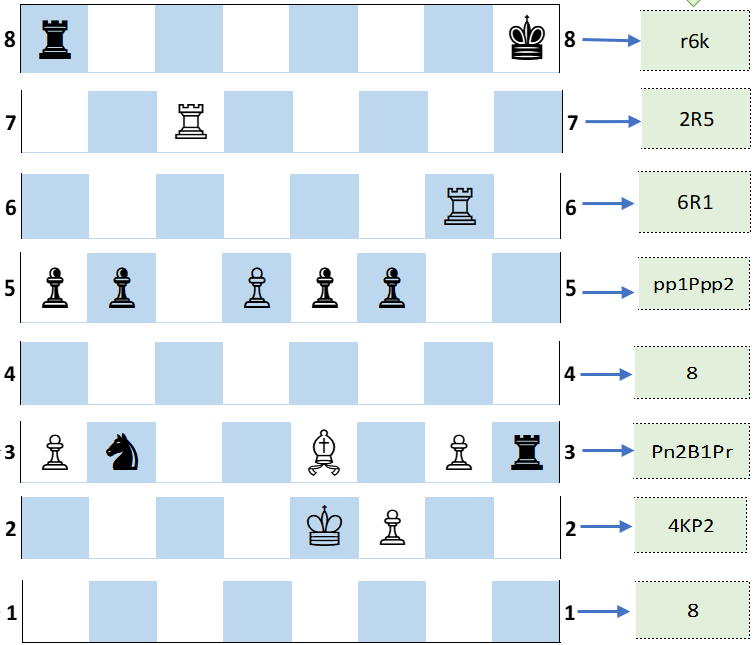

In [6]:
for dirs in Data_Directory_List:
    pgn = open(dirs + '\All Games.pgn')
    game = chess.pgn.read_game(pgn)
    ticker = 0
    while game and ticker < 500:
        ticker += 1
        Data = pd.DataFrame.from_dict(Browse_Games(pgn))
        if len(Data) > 5:
            Data.to_csv(dirs + '\Round' + ' ' + str(ticker) + '.csv',index = False)
